<a href="https://colab.research.google.com/github/arnautoleg/MihaelaCLH/blob/main/MihaelaCLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd


In [ ]:
url = "https://github.com/arnautoleg/MihaelaCLH/raw/793a6f10abf966e364afe406f17d54973dbd57bb/Statistica%202023.xlsx"
df=pd.read_excel(url)

df.drop('Num fisa', axis=1, inplace=True)
df

In [88]:
df.columns = ['Gender', 'Aging', 'Diagnosis', 'Days, hospital', 'Outcome',
              'Microbiology', 'Leukocytes', 'Anesthesia', 'Origin',
              'Spatial counts', 'Tracheostomy', 'Complications',
              'Treatment']

df.head()

,Gender,Aging,Diagnosis,"Days, hospital",Outcome,Microbiology,Leukocytes,Anesthesia,Origin,Spatial counts,Tracheostomy,Complications,Treatment
0,masc,24,Flegmon al planseului bucal si cervical bila...,15.0,externat,"Peptostreptococcus - gram""+""coci anaerobi",24.45,generala,odontogena,7.0,da,Mediastinita anterioara si posterioara,Metoda clasica
1,masc,24,Flegmon al planseului bucal pe stinga,16.0,externat,Staphylococcus epidermidis,12.60,generala,odontogena,6.0,da,nu,Metoda clasica
2,masc,37,Flegmon submento-submandibular pe dreapta de l...,7.0,externat,Streptococcus group B,14.53,ALR+pot,odongtogena,2.0,nu,nu,Metoda clasica
3,masc,37,Adenoflegmon latero-cervical pe stinga,4.0,externat,Staphylococcus epidermidis,16.60,ALR+pot,tonzilogena,2.0,nu,nu,Metoda clasica
4,masc,28,Flegmon al planseului bucal pe dreapta de la ...,6.0,externat,Streptococcus group C,11.20,ALR+pot,odontogena,4.0,nu,nu,Metoda clasica


In [89]:
df.dropna(inplace=True)
df.isna().sum()

Gender            0
Aging             0
Diagnosis         0
Days, hospital    0
Outcome           0
Microbiology      0
Leukocytes        0
Anesthesia        0
Origin            0
Spatial counts    0
Tracheostomy      0
Complications     0
Treatment         0
dtype: int64

In [90]:
df.dtypes

Gender             object
Aging               int64
Diagnosis          object
Days, hospital    float64
Outcome            object
Microbiology       object
Leukocytes        float64
Anesthesia         object
Origin             object
Spatial counts    float64
Tracheostomy       object
Complications      object
Treatment          object
dtype: object

## Statistica descriptiva pentru datele cantitative

In [91]:
round(round(df[['Aging', 'Leukocytes', 'Spatial counts', 'Days, hospital']], 1).describe(), 1)

,Aging,Leukocytes,Spatial counts,"Days, hospital"
count,100.0,100.0,100.0,100.0
mean,45.2,15.8,3.8,7.4
std,16.2,4.7,1.7,6.0
min,23.0,9.7,2.0,2.0
25%,32.8,12.4,2.0,4.0
50%,39.5,14.5,4.0,5.0
75%,58.0,18.6,5.0,7.2
max,85.0,34.0,9.0,42.0


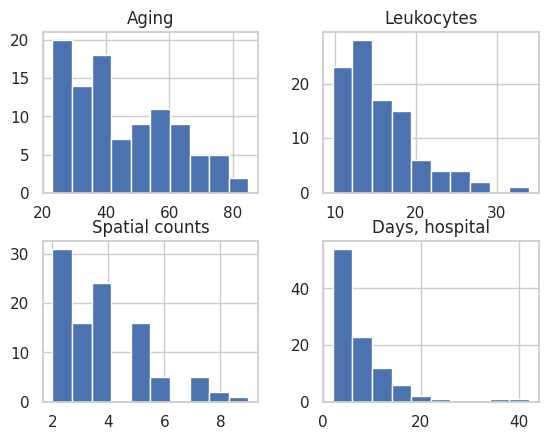

In [92]:
df[['Aging', 'Leukocytes', 'Spatial counts', 'Days, hospital']].hist();

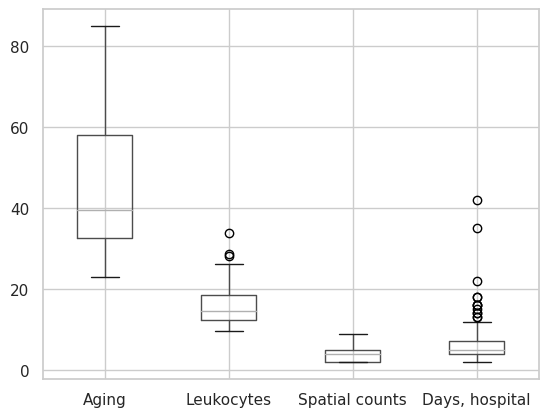

In [93]:
df[['Aging', 'Leukocytes', 'Spatial counts', 'Days, hospital']].boxplot();

## Statistica descriptiva pentru datele calitative

In [123]:
df['Gender'] = df['Gender'].replace(['masc', 'fem'], ['M', 'F'])
df['Tracheostomy'] = df['Tracheostomy'].replace(['da', 'nu', 'nu '], ['Tracheostomy', 'nonTracheostomy', 'nonTracheostomy'])
df['Treatment'] = df['Treatment'].replace(['Metoda clasica', 'Drenarea activa', 'Suturi primare', 'Terapie prin presiune negativa'],
                                          ['Classic', 'Active drainage', 'Primary sutures', 'Negative pressure'])
df['Outcome'] = df['Outcome'].replace(['externat', 'Decedat in Reanimare', 'Decedat in TI'], ['Survive', 'nonSurvive', 'nonSurvive'])

df['Anesthesia'] = df['Anesthesia'].replace(['generala', 'ALR+pot'], ['General', 'LR'])
df['Origin'] = df['Origin'].replace(['odontogena', 'odongtogena', 'tonzilogena', 'dontogen', 'odotogen'],
                                    ['Odontogene', 'Odontogene', 'Tonsilogene', 'Odontogene', 'Odontogene'])


In [125]:
for i in ['Gender', 'Tracheostomy', 'Treatment', 'Anesthesia', 'Origin', 'Outcome']:
  print(df[i].value_counts(normalize=True))
  print('___________________________________________________')

M    0.56
F    0.44
Name: Gender, dtype: float64
___________________________________________________
nonTracheostomy    0.84
Tracheostomy       0.16
Name: Tracheostomy, dtype: float64
___________________________________________________
Classic              0.72
Primary sutures      0.13
Active drainage      0.10
Negative pressure    0.05
Name: Treatment, dtype: float64
___________________________________________________
LR         0.68
General    0.32
Name: Anesthesia, dtype: float64
___________________________________________________
Odontogene     0.93
Tonsilogene    0.07
Name: Origin, dtype: float64
___________________________________________________
Survive       0.9
nonSurvive    0.1
Name: Outcome, dtype: float64
___________________________________________________


In [126]:
df.Anesthesia.value_counts(normalize=True).values

array([0.68, 0.32])

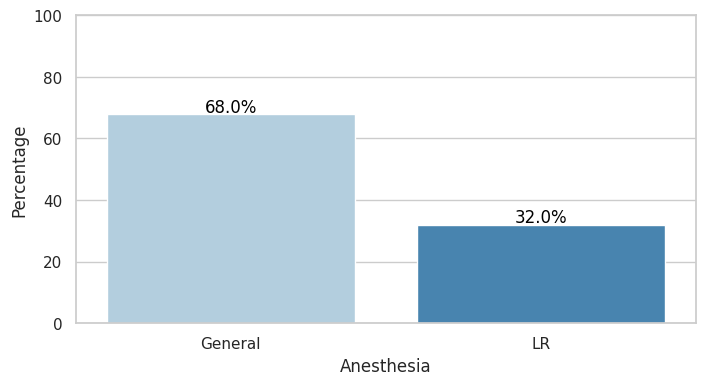

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['General', 'LR']
percentages = [round(x*100, 1) for x in df.Anesthesia.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
plt.xlabel("Anesthesia")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [131]:
df.Origin.value_counts(normalize=True).values

array([0.93, 0.07])

In [135]:
df.Origin.value_counts(normalize=True).index

Index(['Odontogene', 'Tonsilogene'], dtype='object')

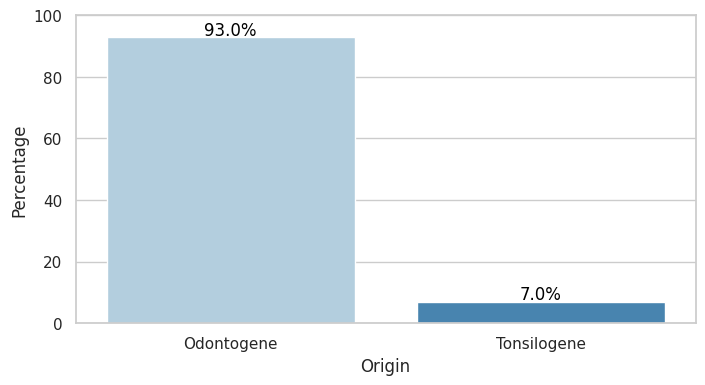

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['Odontogene', 'Tonsilogene']
percentages = [round(x*100, 1) for x in df.Origin.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
plt.xlabel("Origin")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [96]:
df.Gender.value_counts(normalize=True).values

array([0.56, 0.44])

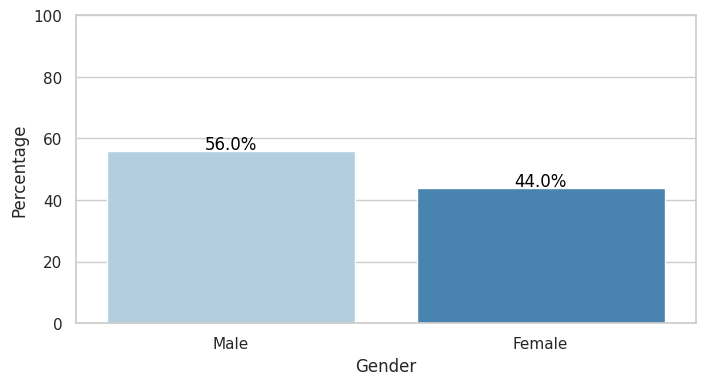

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['Male', 'Female']
percentages = [round(x*100, 1) for x in df.Gender.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
plt.xlabel("Gender")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [98]:
df.Tracheostomy.value_counts(normalize=True).values

array([0.84, 0.16])

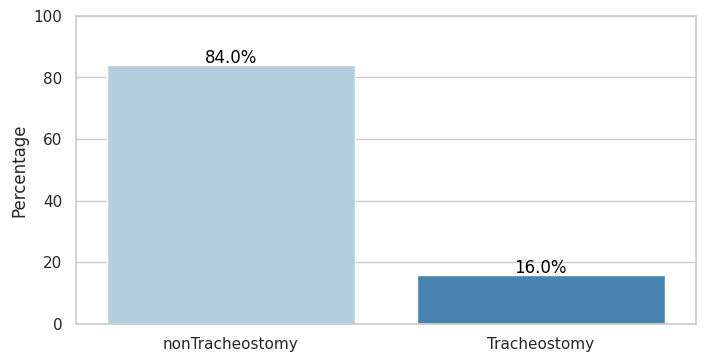

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['nonTracheostomy', 'Tracheostomy']
percentages = [round(x*100, 1) for x in df.Tracheostomy.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
#plt.xlabel("Gender")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [101]:
df.Treatment.value_counts(normalize=True).values

array([0.72, 0.13, 0.1 , 0.05])

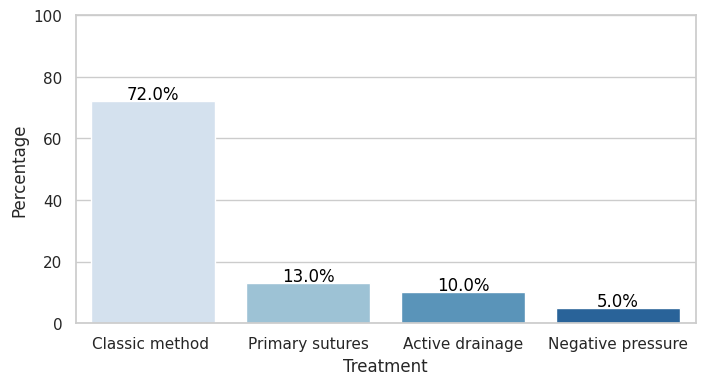

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['Classic method ', 'Primary sutures', 'Active drainage', 'Negative pressure']
percentages = [round(x*100, 1) for x in df.Treatment.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
plt.xlabel("Treatment")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [104]:
df.Outcome.value_counts(normalize=True).values

array([0.9, 0.1])

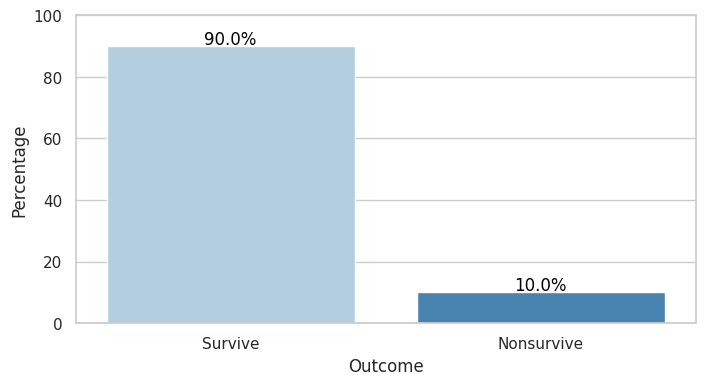

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own percentages)
categories = ['Survive', 'Nonsurvive']
percentages = [round(x*100, 1) for x in df.Outcome.value_counts(normalize=True).values]  # Replace with your actual percentages

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create the bar plot
ax = sns.barplot(x=categories, y=percentages, palette="Blues")

# Add labels and title
plt.ylim(0, 100)
plt.xlabel("Outcome")
plt.ylabel("Percentage")
#plt.title("Primary clinical signs, %")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [108]:
df[['Diagnosis', 'Microbiology',  'Anesthesia', 'Origin', 'Complications']].head()

,Diagnosis,Microbiology,Anesthesia,Origin,Complications
0,Flegmon al planseului bucal si cervical bila...,"Peptostreptococcus - gram""+""coci anaerobi",generala,odontogena,Mediastinita anterioara si posterioara
1,Flegmon al planseului bucal pe stinga,Staphylococcus epidermidis,generala,odontogena,nu
2,Flegmon submento-submandibular pe dreapta de l...,Streptococcus group B,ALR+pot,odongtogena,nu
3,Adenoflegmon latero-cervical pe stinga,Staphylococcus epidermidis,ALR+pot,tonzilogena,nu
4,Flegmon al planseului bucal pe dreapta de la ...,Streptococcus group C,ALR+pot,odontogena,nu


In [111]:
df.Microbiology.unique() # A lot of potential categories. In perspectives we need to make a couple of them

array(['Peptostreptococcus - gram"+"coci anaerobi   \xa0',
       'Staphylococcus epidermidis', 'Streptococcus group B ',
       'Streptococcus group C', 'Streptococcus pyogenes',
       'Streptococcus group G', 'Streptococcus group C  ',
       'Enterococcus spp', 'Streptococcus group B',
       'Peptococcus - gram"+"coci anaerobi   ',
       'Staphylococcus haemolyticus', 'Streptococcus group G10',
       'Pseudomonas aeruginosa', 'Enterococcus faecium',
       'Enterococcus faecalis', 'Streptococcus anginosus',
       'Streptococcus group G1 \xa0 ', 'Acinetobacter baumannii',
       'Peptostreptococcus - gram"+"streptococci anaerobi    ',
       'Streptococcus agalactiae',
       'Peptostreptococcus - gram"+"streptococci anaerobi   ',
       'Streptococcus sanguinis', 'Klebsiella pneumoniae',
       'Streptococcus gordonii', 'Staphylococcus aureus',
       'Acinetobacter baumanni'], dtype=object)

In [112]:
df.Anesthesia.unique()

array(['generala', 'ALR+pot'], dtype=object)

## Groups

In [144]:
round(df.groupby(['Outcome'])[['Aging', 'Leukocytes', 'Spatial counts', 'Days, hospital']].describe().T, 1)

Outcome               Survive  nonSurvive
Aging          count     90.0        10.0
               mean      43.1        63.7
               std       14.9        16.4
               min       23.0        32.0
               25%       30.2        60.8
               50%       39.0        66.5
               75%       55.0        74.8
               max       84.0        85.0
Leukocytes     count     90.0        10.0
               mean      15.3        20.4
               std        4.4         5.6
               min        9.7        12.2
               25%       12.1        15.7
               50%       14.1        20.6
               75%       17.7        25.0
               max       34.0        28.6
Spatial counts count     90.0        10.0
               mean       3.5         5.7
               std        1.5         1.9
               min        2.0         3.0
               25%        2.0         4.2
               50%        3.0         5.0
               75%        4.0         7.0
               max        8.0         9.0
Days, hospital count     90.0        10.0
               mean       6.7        14.0
               std        4.6        11.4
               min        2.0         3.0
               25%        4.0         7.0
               50%        5.0        10.0
               75%        7.0        17.0
               max       35.0        42.0

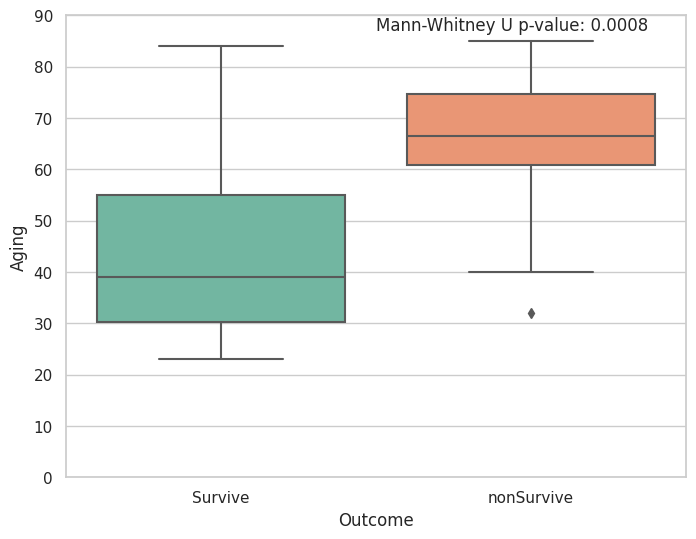

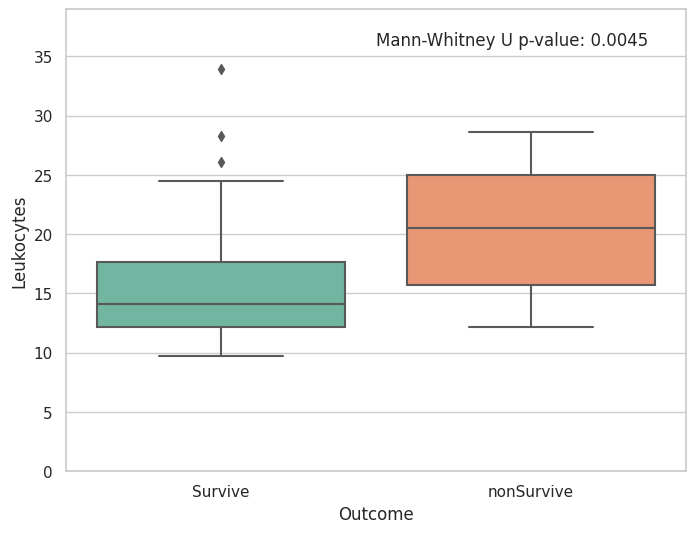

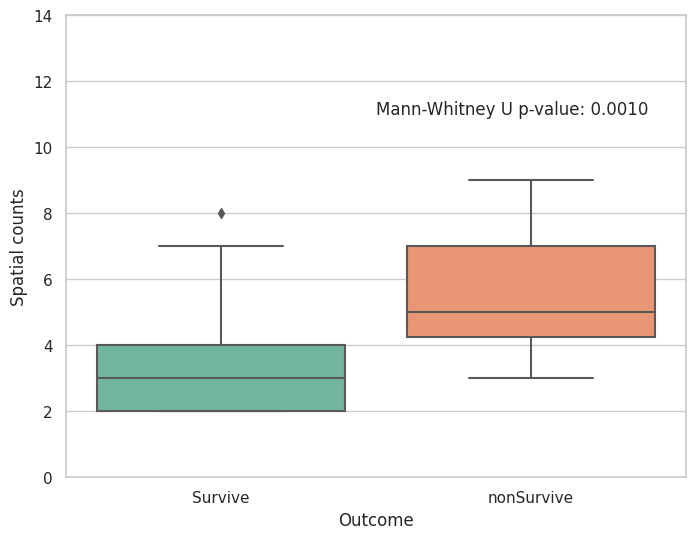

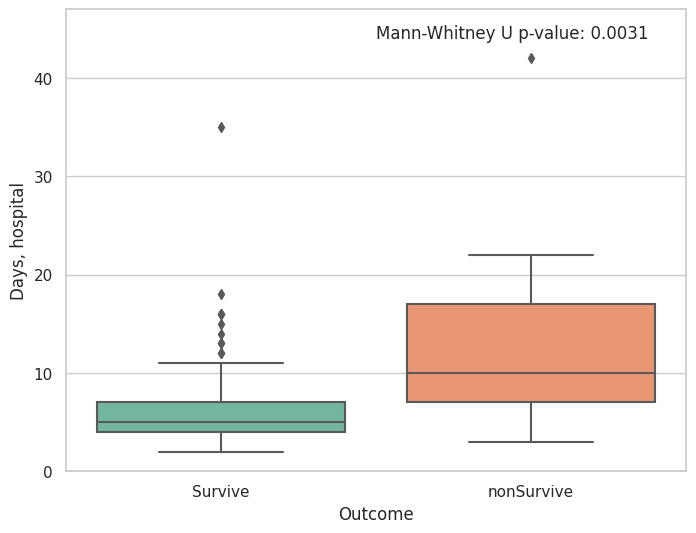

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for var in ['Aging', 'Leukocytes', 'Spatial counts', 'Days, hospital']:
  # Separate data into two groups based on 'Grouping_Variable'
  group1 = df[df['Outcome'] == 'Survive'][var]
  group2 = df[df['Outcome'] == 'nonSurvive'][var]

  # Perform the Mann-Whitney U test
  statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

  # Create a boxplot with separate groups
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Outcome', y=var, data=df, palette='Set2')
  #plt.title("Outcome")
  plt.ylim(0, max(group1.max(), group2.max()) + 5)
  plt.ylabel(var)

  # Display the Mann-Whitney U test result
  plt.text(0.5, max(group1.max(), group2.max()) + 2, f'Mann-Whitney U p-value: {p_value:.4f}', fontsize=12)

  # Show the plot
  plt.show()

# Display the p-value
#print(f"Mann-Whitney U Statistic: {statistic}")
#print(f"P-value: {p_value}")




In [156]:
for i in ['Gender', 'Tracheostomy', 'Treatment', 'Anesthesia', 'Origin']:
  print(round(df.groupby('Outcome')[[i]].value_counts(normalize=True)*100, 1))
  print('_________________________________________')

Outcome     Gender
Survive     M         55.6
            F         44.4
nonSurvive  M         60.0
            F         40.0
dtype: float64
_________________________________________
Outcome     Tracheostomy   
Survive     nonTracheostomy    88.9
            Tracheostomy       11.1
nonSurvive  Tracheostomy       60.0
            nonTracheostomy    40.0
dtype: float64
_________________________________________
Outcome     Treatment        
Survive     Classic               68.9
            Primary sutures       14.4
            Active drainage       11.1
            Negative pressure      5.6
nonSurvive  Classic              100.0
dtype: float64
_________________________________________
Outcome     Anesthesia
Survive     LR             75.6
            General        24.4
nonSurvive  General       100.0
dtype: float64
_________________________________________
Outcome     Origin     
Survive     Odontogene      92.2
            Tonsilogene      7.8
nonSurvive  Odontogene     100.0
dtype: